# Projet de fin de module Master
Analyse des Publications Scientifiques avec l'API Scopus

# Réaliser par: 
              Fatima AADIL
              Laila Ettaqy
              El Mazouzy Zineb

Objectif:Ce projet vise à récupérer les informations sur les publications scientifiques depuis Scopus via leur API, pour ensuite analyser et visualiser ces données en utilisant les bibliothèques Python NumPy, Pandas et Matplotlib.

Importation des bibliothèque nécessaires

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Récupération des Données de Scopus

clé API Scopus

In [17]:

api_key = '3107e4dd0dc06965598eea9d1f9e3a28'

 Liste des DOI pour lesquels les informations doivent être récupérées

In [19]:

BASE_URL = 'https://api.elsevier.com/content/search/scopus'

def get_dois_from_scopus(query, api_key):
    headers = {
        'Accept': 'application/json',
        'X-ELS-APIKey': api_key
    }
    params = {
        'query': query,
        'count': 25
    }
    
    response = requests.get(BASE_URL, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        entries = data.get('search-results', {}).get('entry', [])
        dois = [entry['prism:doi'] for entry in entries if 'prism:doi' in entry]
        return dois
    else:
        print(f"Erreur: {response.status_code}")
        return []


query = 'TITLE-ABS-KEY("machine learning")'
dois = get_dois_from_scopus(query,api_key)
print("Les DOI extraits sont :")
for doi in dois:
    print(doi)


Les DOI extraits sont :
10.1016/j.csa.2024.100057
10.1016/j.jes.2024.04.003
10.1016/j.jes.2024.03.051
10.1016/j.jes.2024.03.037
10.37934/araset.46.1.187200
10.37934/araset.46.1.7585
10.1115/1.4063266
10.37934/araset.45.2.214226
10.37934/araset.45.2.168176
10.37934/araset.45.1.90107
10.37934/araset.45.1.4050
10.37934/araset.45.1.5159
10.37934/araset.44.2.1124
10.1115/1.4065077
10.1016/j.jes.2024.01.023
10.1016/j.jes.2023.08.007
10.1016/j.jmst.2024.05.024
10.1016/j.jmst.2024.02.094
10.37934/araset.44.1.225238
10.1115/1.4065095
10.1016/j.seppur.2024.128466
10.1016/j.jsc.2024.102345
10.1016/j.entcom.2024.100787
10.1016/j.entcom.2024.100725
10.1016/j.entcom.2024.100784


 Fonction pour récupérer les informations de publication pour un DOI donné

In [20]:
base_url = 'https://doi.org/'
def fetch_publication_info(doi, api_key):
    url = f'{base_url}{doi}'
    headers = {
        'Accept': 'application/json',
        'X-ELS-APIKey': api_key
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur : {response.status_code} pour le DOI {doi}")
        return None

Liste pour stocker les informations de publication

In [21]:

publications_info = []

Récupération des informations pour chaque DOI

In [22]:

for doi in dois:
    info = fetch_publication_info(doi, api_key)
    if info:
        publications_info.append(info)

Conversion des informations en DataFrame Pandas

In [23]:

df = pd.json_normalize(publications_info)

Affichage des premières lignes du DataFrame

In [24]:

print(df.head())

   reference-count                 publisher  \
0              106               Elsevier BV   
1              167               Elsevier BV   
2               57               Elsevier BV   
3               80               Elsevier BV   
4                0  Akademia Baru Publishing   

                                             license  \
0  [{'start': {'date-parts': [[2025, 12, 1]], 'da...   
1  [{'start': {'date-parts': [[2025, 5, 1]], 'dat...   
2  [{'start': {'date-parts': [[2025, 5, 1]], 'dat...   
3  [{'start': {'date-parts': [[2025, 5, 1]], 'dat...   
4                                                NaN   

                           DOI             type     page  \
0    10.1016/j.csa.2024.100057  journal-article   100057   
1    10.1016/j.jes.2024.04.003  journal-article  310-330   
2    10.1016/j.jes.2024.03.051  journal-article  211-224   
3    10.1016/j.jes.2024.03.037  journal-article  125-139   
4  10.37934/araset.46.1.187200  journal-article  187-200   

             

Affichage des colonnes

In [25]:
print(df.columns)

Index(['reference-count', 'publisher', 'license', 'DOI', 'type', 'page',
       'update-policy', 'source', 'is-referenced-by-count', 'title', 'prefix',
       'volume', 'author', 'member', 'reference', 'container-title',
       'original-title', 'language', 'link', 'score', 'subtitle',
       'short-title', 'references-count', 'alternative-id', 'URL', 'ISSN',
       'subject', 'container-title-short', 'assertion', 'article-number',
       'indexed.date-parts', 'indexed.date-time', 'indexed.timestamp',
       'content-domain.domain', 'content-domain.crossmark-restriction',
       'published-print.date-parts', 'created.date-parts', 'created.date-time',
       'created.timestamp', 'deposited.date-parts', 'deposited.date-time',
       'deposited.timestamp', 'resource.primary.URL', 'issued.date-parts',
       'published.date-parts', 'funder', 'issue', 'abstract',
       'published-online.date-parts', 'journal-issue.issue',
       'journal-issue.published-online.date-parts',
       'journal-

Sauvegarde des données dans un fichier CSV

In [26]:

df.to_csv('publications_info.csv', index=False)

Convertir la colonne 'is-referenced-by-count' en type entier

In [27]:
df['is-referenced-by-count'] = df['is-referenced-by-count'].astype(int)


# Analyse des Données

 1. Nombre Total de Publications

In [28]:

total_publications = len(df)
print(f"Nombre total de publications: {total_publications}")

Nombre total de publications: 25


2. Nombre Total de Citations

In [29]:
total_citations = df['is-referenced-by-count'].sum()
print(f"Nombre total de citations: {total_citations}")

Nombre total de citations: 5


3. Citations Moyennes par Publication

In [30]:

average_citations = df['is-referenced-by-count'].mean()
print(f"Citations moyennes par publication: {average_citations}")

Citations moyennes par publication: 0.2


 4. Publications avec le Plus de Citations

In [31]:
top_cited_publications = df.sort_values(by='is-referenced-by-count', ascending=False).head()
print("Publications avec le plus de citations:")
print(top_cited_publications[['title', 'is-referenced-by-count']])

Publications avec le plus de citations:
                                                title  is-referenced-by-count
15  Spatial differentiation of carbon emissions fr...                       2
0   Authentication, access control and scalability...                       1
3   Interpreting hourly mass concentrations of PM2...                       1
1   Research progress on secondary formation, phot...                       1
14  Machine learning-assisted fluorescence visuali...                       0


 5. Distribution des Citations

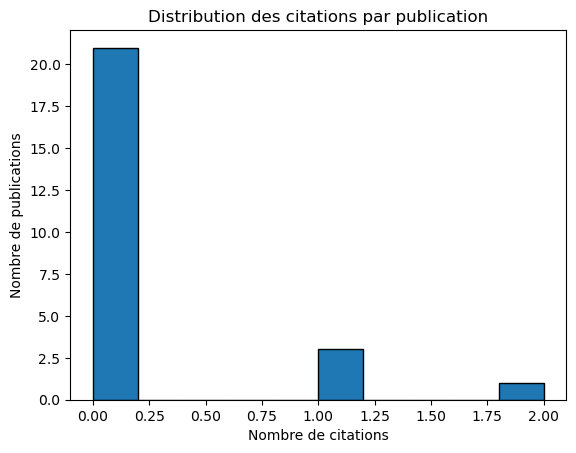

In [32]:

plt.hist(df['is-referenced-by-count'], bins=10, edgecolor='black')
plt.title('Distribution des citations par publication')
plt.xlabel('Nombre de citations')
plt.ylabel('Nombre de publications')
plt.show()

Convertir la colonne 'issued.date-parts' en année

In [33]:
df['year'] = df['issued.date-parts'].apply(lambda x: x[0][0] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], list) else None)

 Vérifier si la colonne 'year' a été correctement créée

In [34]:
print(df[['issued.date-parts', 'year']].head())

  issued.date-parts  year
0      [[2025, 12]]  2025
1       [[2025, 5]]  2025
2       [[2025, 5]]  2025
3       [[2025, 5]]  2025
4    [[2024, 6, 4]]  2024


Compter les citations par année

In [35]:
citations_per_year = df.groupby('year')['reference-count'].sum()

Afficher le résultat

In [36]:
print("Citations par année:")
print(citations_per_year)

Citations par année:
year
2024      89
2025    1024
Name: reference-count, dtype: int64


 Exploser la colonne 'author' pour avoir un auteur par ligne

In [37]:
authors_exploded = df.explode('author')

 Compter les publications par auteur

In [38]:
publications_per_author = authors_exploded['author'].value_counts()

print("Répartition des Publications par Auteur:")
print(publications_per_author)

Répartition des Publications par Auteur:
author
{'given': 'Xin', 'family': 'Li', 'sequence': 'additional', 'affiliation': []}                                                                                2
{'ORCID': 'http://orcid.org/0009-0006-4062-8494', 'authenticated-orcid': False, 'given': 'M', 'family': 'Kokila', 'sequence': 'first', 'affiliation': []}    1
{'given': 'Zhiqing', 'family': 'Wen', 'sequence': 'additional', 'affiliation': []}                                                                           1
{'given': 'Xiufang', 'family': 'Zhou', 'sequence': 'additional', 'affiliation': []}                                                                          1
{'given': 'Xin', 'family': 'Mu', 'sequence': 'additional', 'affiliation': []}                                                                                1
                                                                                                                                                            .

Calculer la corrélation entre 'reference-count' et 'year'

In [39]:

correlation = df[['reference-count', 'year']].corr().iloc[0, 1]

print("Corrélation entre le Nombre de Citations et les Années de Publication:")
print(correlation)

Corrélation entre le Nombre de Citations et les Années de Publication:
0.6319794705221748


In [40]:
pip install rdflib SPARQLWrapper


Note: you may need to restart the kernel to use updated packages.


In [41]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import FOAF, DC
from SPARQLWrapper import SPARQLWrapper, JSON

In [42]:
# Créer un Graph RDF
g = Graph()


In [43]:
# Créer un Namespace d'exemple
EX = Namespace("http://example.org/")

# Lier le namespace à un préfixe
g.bind("ex", EX)

In [47]:
# Ajouter les informations des publications au graph RDF
for index, row in df.iterrows():
    pub_ref = URIRef(f"http://example.org/publication/{row['DOI']}")
    g.add((pub_ref, RDF.type, EX.Publication))
    g.add((pub_ref, DC.identifier, Literal(row['DOI'])))
    g.add((pub_ref, DC.title, Literal(row['title'])))
    g.add((pub_ref, DC.creator, Literal(row['author'] if 'author' in row else '')))
    g.add((pub_ref, DC.date, Literal(row['year'])))
    g.add((pub_ref, EX.citations, Literal(row['is-referenced-by-count'])))


In [58]:
print(g.serialize(format='xml'))


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:ex="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/publication/10.1115/1.4063266">
    <rdf:type rdf:resource="http://example.org/Publication"/>
    <dc:identifier>10.1115/1.4063266</dc:identifier>
    <dc:title>A Comparative Study of LSTM and Temporal Convolutional Network Models for Semisubmersible Platform Wave Runup Prediction</dc:title>
    <dc:creator>[{'given': 'Yan', 'family': 'Li', 'sequence': 'first', 'affiliation': [{'name': 'Shanghai Jiao Tong University State Key Laboratory of Ocean Engineering, , No. 800, Dongchuan Road, Minhang District, Shanghai 200240 , China'}]}, {'given': 'Longfei', 'family': 'Xiao', 'sequence': 'additional', 'affiliation': [{'name': 'Shanghai Jiao Tong University State Key Laboratory of Ocean Engineering, , No. 800, Dongchuan Road, Minhang District, Shanghai 200240

In [59]:

# Sauvegarder le graph RDF dans un fichier
g.serialize(destination='publications.rdf', format='xml')

<Graph identifier=Ndf4a655c8763440996edae247e59e592 (<class 'rdflib.graph.Graph'>)>

In [60]:
# Charger les données RDF depuis le fichier
g = Graph()
g.parse("publications.rdf")

<Graph identifier=Nca5263d58900476bbc8ea3dca404aaa9 (<class 'rdflib.graph.Graph'>)>

In [75]:


# Définir le point de terminaison SPARQL (pour un fichier local, nous allons interroger directement dans le graph)
query = """
PREFIX ex: <http://example.org/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>

SELECT ?DOI ?title ?author ?year ?citations
WHERE {
    ?pub ex:citations ?citations .
    ?pub dc:identifier ?DOI .
    ?pub dc:title ?title .
    ?pub dc:creator ?author .
    ?pub dc:date 2025 .
   
}
"""



In [76]:
# Exécuter la requête directement sur le graph
results = g.query(query)
results


In [80]:
# Imprimer les résultats
for row in results:
    print(f"DOI: {row.DOI}, Titre: {row.title}, Année: {row.year}, Citations: {row.citations}")


DOI: 10.1016/j.jsc.2024.102345, Titre: Machine learning parameter systems, Noether normalisations and quasi-stable positions, Année: None, Citations: 0
DOI: 10.1016/j.jes.2024.03.051, Titre: Development of an automated photolysis rates prediction system based on machine learning, Année: None, Citations: 0
DOI: 10.1016/j.entcom.2024.100725, Titre: Entertainment analysis in gaming model for business management with decision making and Machine learning model, Année: None, Citations: 0
DOI: 10.1016/j.jmst.2024.02.094, Titre: Recent advance in coating strategies for lithium-rich manganese-based cathode materials, Année: None, Citations: 0
DOI: 10.1016/j.seppur.2024.128466, Titre: Adsorbent shaping as enabler for intensified pressure swing adsorption (PSA): A critical review, Année: None, Citations: 0
DOI: 10.1016/j.entcom.2024.100787, Titre: Entertainment robots based on smartphone terminals for mobile network music E-learning mode, Année: None, Citations: 0
DOI: 10.1016/j.jes.2024.01.023, 